In [1]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path # to interact with file system.


from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing


from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline
import matplotlib.pylab as plt # %matplotlib inline renders the figure in a notebook

import os
import calendar
import networkx as nx

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

%matplotlib inline


In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [4]:
rotten_tomatoes_df = pd.read_csv('rotten_tomatoes_movies.csv') #, encoding = "ISO-8859-1")

rotten_tomatoes_df.head() 

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
rotten_tomatoes_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [6]:
# Drop unnecessary columns

columns_to_drop = ['rotten_tomatoes_link', 'movie_title', 'movie_info', 'genres',
                   'critics_consensus', 'directors', 'authors', 'production_company',
                   'actors', 'original_release_date', 'streaming_release_date' ]

rotten_tomatoes_df.drop(columns=columns_to_drop, inplace=True)

rotten_tomatoes_df



,content_rating,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,PG,119.0,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,R,90.0,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,R,122.0,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,NR,95.0,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,G,127.0,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...
17707,R,104.0,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,PG,108.0,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,NR,142.0,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,PG,135.0,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [7]:
rotten_tomatoes_df.columns

Index(['content_rating', 'runtime', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

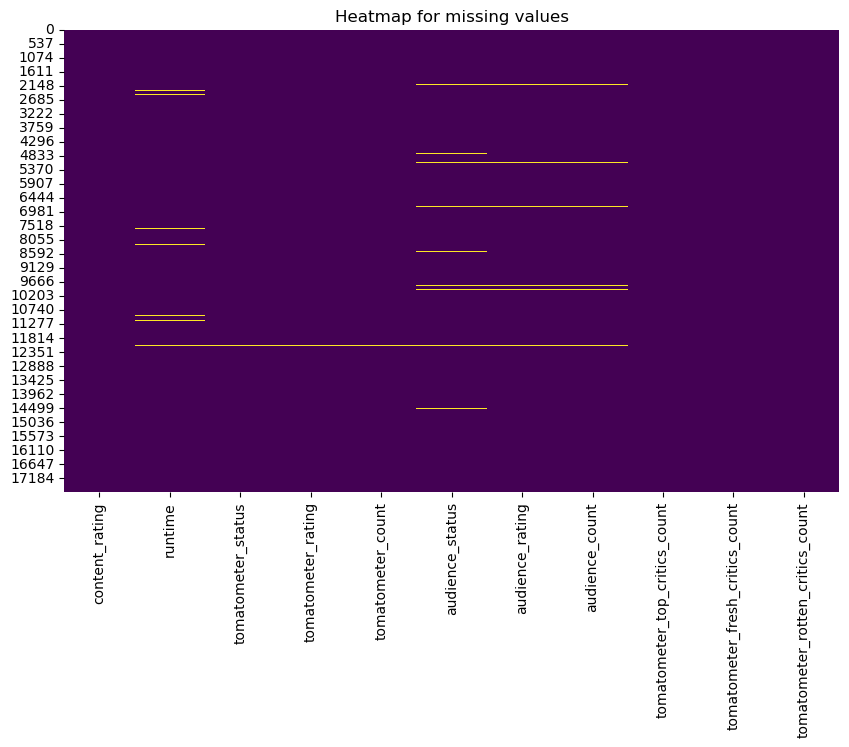

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(rotten_tomatoes_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap for missing values')
plt.show()

In [9]:
# Check for missing values in the entire DataFrame
missing_values = rotten_tomatoes_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
if rotten_tomatoes_df.isnull().values.any():
    print("\nThere are missing values in the DataFrame.")
else:
    print("\nNo missing values found in the DataFrame.")

Missing Values:
content_rating                        0
runtime                             314
tomatometer_status                   44
tomatometer_rating                   44
tomatometer_count                    44
audience_status                     448
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64

There are missing values in the DataFrame.


In [10]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   content_rating                    17712 non-null  object 
 1   runtime                           17398 non-null  float64
 2   tomatometer_status                17668 non-null  object 
 3   tomatometer_rating                17668 non-null  float64
 4   tomatometer_count                 17668 non-null  float64
 5   audience_status                   17264 non-null  object 
 6   audience_rating                   17416 non-null  float64
 7   audience_count                    17415 non-null  float64
 8   tomatometer_top_critics_count     17712 non-null  int64  
 9   tomatometer_fresh_critics_count   17712 non-null  int64  
 10  tomatometer_rotten_critics_count  17712 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [11]:
rotten_tomatoes_df.head()

,content_rating,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,PG,119.0,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,R,90.0,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,R,122.0,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,NR,95.0,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,G,127.0,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [12]:
# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant',fill_value="Missing")
imputer.fit(rotten_tomatoes_df.select_dtypes(exclude=['int64','float64']))
rotten_tomatoes_df[rotten_tomatoes_df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(rotten_tomatoes_df.select_dtypes(exclude=['int64','float64']))

In [13]:
rotten_tomatoes_df.info

<bound method DataFrame.info of       content_rating  runtime tomatometer_status  tomatometer_rating  \
0                 PG    119.0             Rotten                49.0   
1                  R     90.0    Certified-Fresh                87.0   
2                  R    122.0              Fresh                67.0   
3                 NR     95.0    Certified-Fresh               100.0   
4                  G    127.0              Fresh                89.0   
...              ...      ...                ...                 ...   
17707              R    104.0             Rotten                56.0   
17708             PG    108.0    Certified-Fresh                98.0   
17709             NR    142.0              Fresh                80.0   
17710             PG    135.0              Fresh                96.0   
17711             PG    121.0             Rotten                50.0   

       tomatometer_count audience_status  audience_rating  audience_count  \
0                  149.0  

['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']


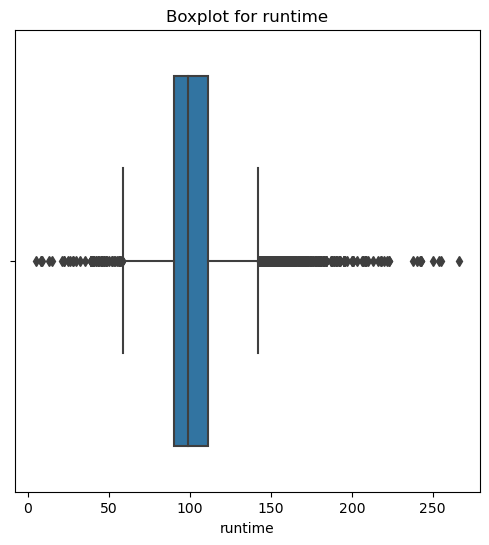

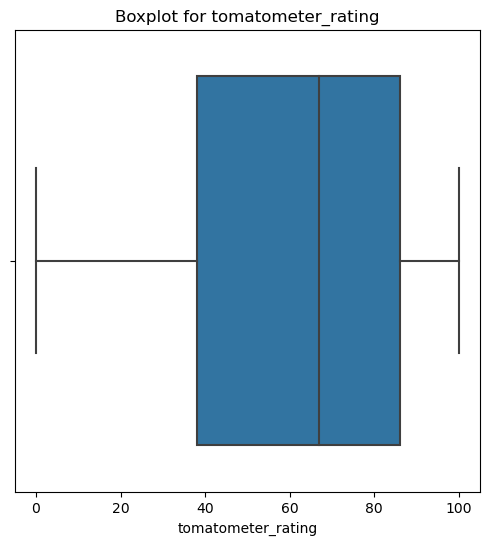

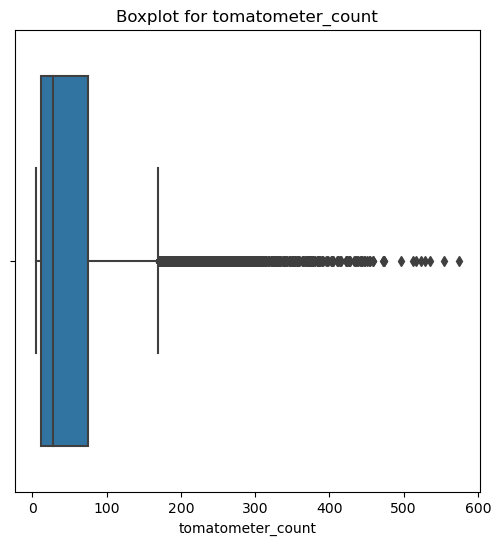

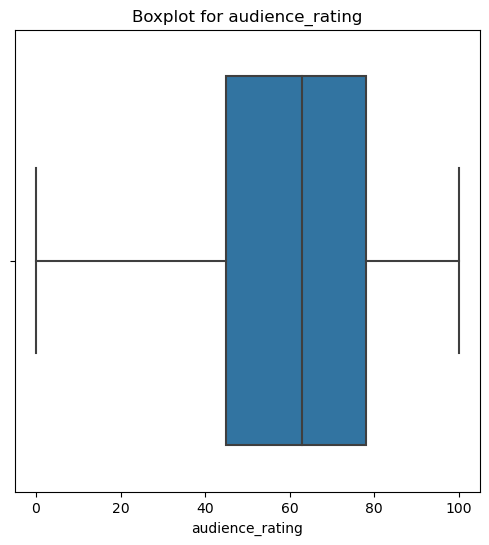

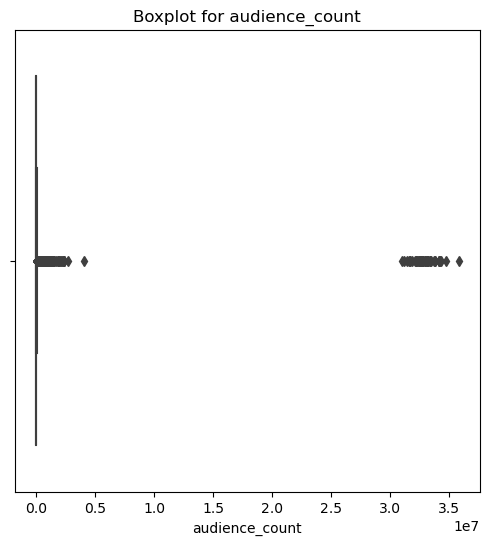

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns with NaN values
columns_with_nan = rotten_tomatoes_df.columns[rotten_tomatoes_df.isna().any()].tolist()
print(columns_with_nan)
# Check for outliers using box plots
for column in columns_with_nan:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=rotten_tomatoes_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


In [15]:
# Function to count outliers using Z-score
def count_outliers(series, z_threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return len(z_scores[z_scores > z_threshold])

# Select columns with NaN values
columns_with_nan = rotten_tomatoes_df.columns[rotten_tomatoes_df.isna().any()].tolist()


for column in columns_with_nan:
    outliers_count = count_outliers(rotten_tomatoes_df[column])
    print(f'Column "{column}" - {outliers_count} outliers.')

Column "runtime" - 290 outliers.
Column "tomatometer_rating" - 0 outliers.
Column "tomatometer_count" - 338 outliers.
Column "audience_rating" - 0 outliers.
Column "audience_count" - 50 outliers.


In [16]:
# Function to replace missing values with mean or median based on the presence of outliers
def replace_missing_values(column, z_threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    
    if np.sum(z_scores > z_threshold) == 0:
        # No outliers, replace with mean
        return column.fillna(column.mean())
    else:
        # Outliers present, replace with median
        return column.fillna(column.median())

# Columns with 0 outliers (replace with mean)
columns_with_0_outliers = ['tomatometer_rating','audience_rating' ]

# Columns with outliers (replace with median)
columns_with_outliers = ['runtime', 'tomatometer_count', 'audience_count']
    


# Replace missing values
for column in columns_with_0_outliers:
    rotten_tomatoes_df[column] = replace_missing_values(rotten_tomatoes_df[column])

for column in columns_with_outliers:
    rotten_tomatoes_df[column] = replace_missing_values(rotten_tomatoes_df[column])

# Verify the replaced missing values
print(rotten_tomatoes_df.isna().sum())

content_rating                      0
runtime                             0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64


In [20]:

categorical_columns = ['content_rating', 'audience_status', 'tomatometer_status']

# Replace 'Missing' with NaN in categorical columns
rotten_tomatoes_df[categorical_columns] = rotten_tomatoes_df[categorical_columns].replace('Missing', np.nan)

# Replace missing values with mode for all categorical columns
for col in categorical_columns:
    rotten_tomatoes_df[col].fillna(rotten_tomatoes_df[col].mode().iloc[0], inplace=True)

print(rotten_tomatoes_df.columns)


Index(['content_rating', 'runtime', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')


In [21]:
numerical_columns = rotten_tomatoes_df.select_dtypes(include=['float64', 'int64']).columns

print(numerical_columns)

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')


In [22]:
np.round(rotten_tomatoes_df.describe())

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17712.0,17712.0,17712.0,17712.0,17712.0,17712.0,17712.0,17712.0
mean,102.0,61.0,57.0,61.0,141598.0,15.0,36.0,21.0
std,19.0,28.0,68.0,20.0,1748820.0,15.0,53.0,30.0
min,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
25%,90.0,38.0,12.0,45.0,731.0,3.0,6.0,3.0
50%,99.0,67.0,28.0,62.0,4277.0,8.0,16.0,8.0
75%,110.0,86.0,75.0,77.0,23652.0,23.0,44.0,24.0
max,266.0,100.0,574.0,100.0,35797635.0,69.0,497.0,303.0


tomatometer_status
Rotten             7609
Fresh              6844
Certified-Fresh    3259
Name: count, dtype: int64

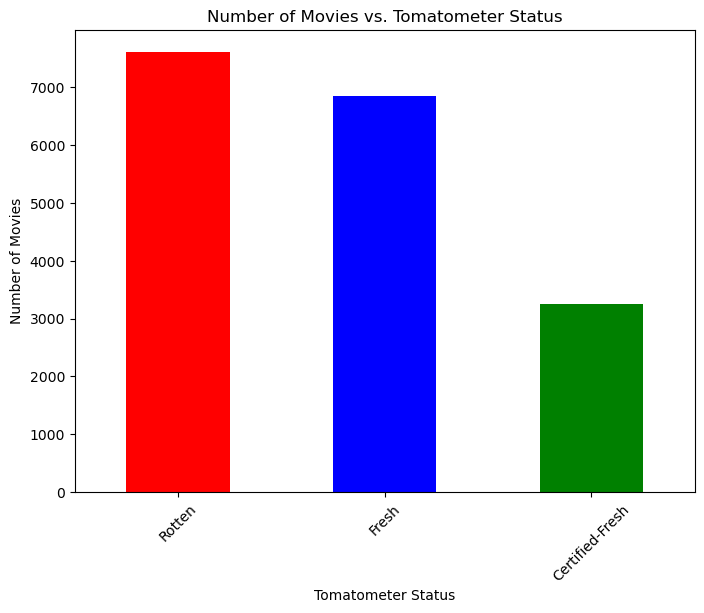

In [23]:
# Tomatometer status vs number of movies
tomatometer_status_counts = rotten_tomatoes_df['tomatometer_status'].value_counts()
colors = ['red', 'blue', 'green']  # Example colors for Fresh, Rotten, Certified Fresh
tomatometer_status_counts.plot(kind='bar', figsize=(8, 6), color=colors)

plt.title('Number of Movies vs. Tomatometer Status')
plt.xlabel('Tomatometer Status')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
tomatometer_status_counts

# Data Visualization

Explore the relationship between numerical predictors

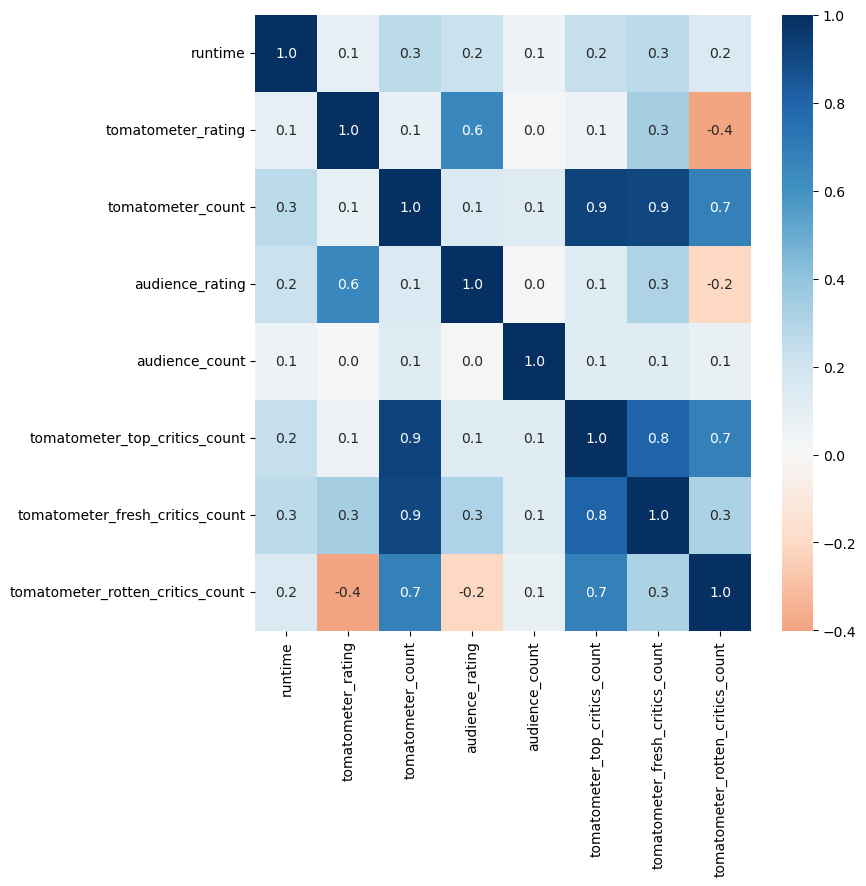

In [24]:
#Creating heatmap to visualize correlations between different variables in the dataset

numeric_columns = rotten_tomatoes_df.select_dtypes(include=[np.number]) # Excluding non-numeric columns to calculate correlations
corr = numeric_columns.corr()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

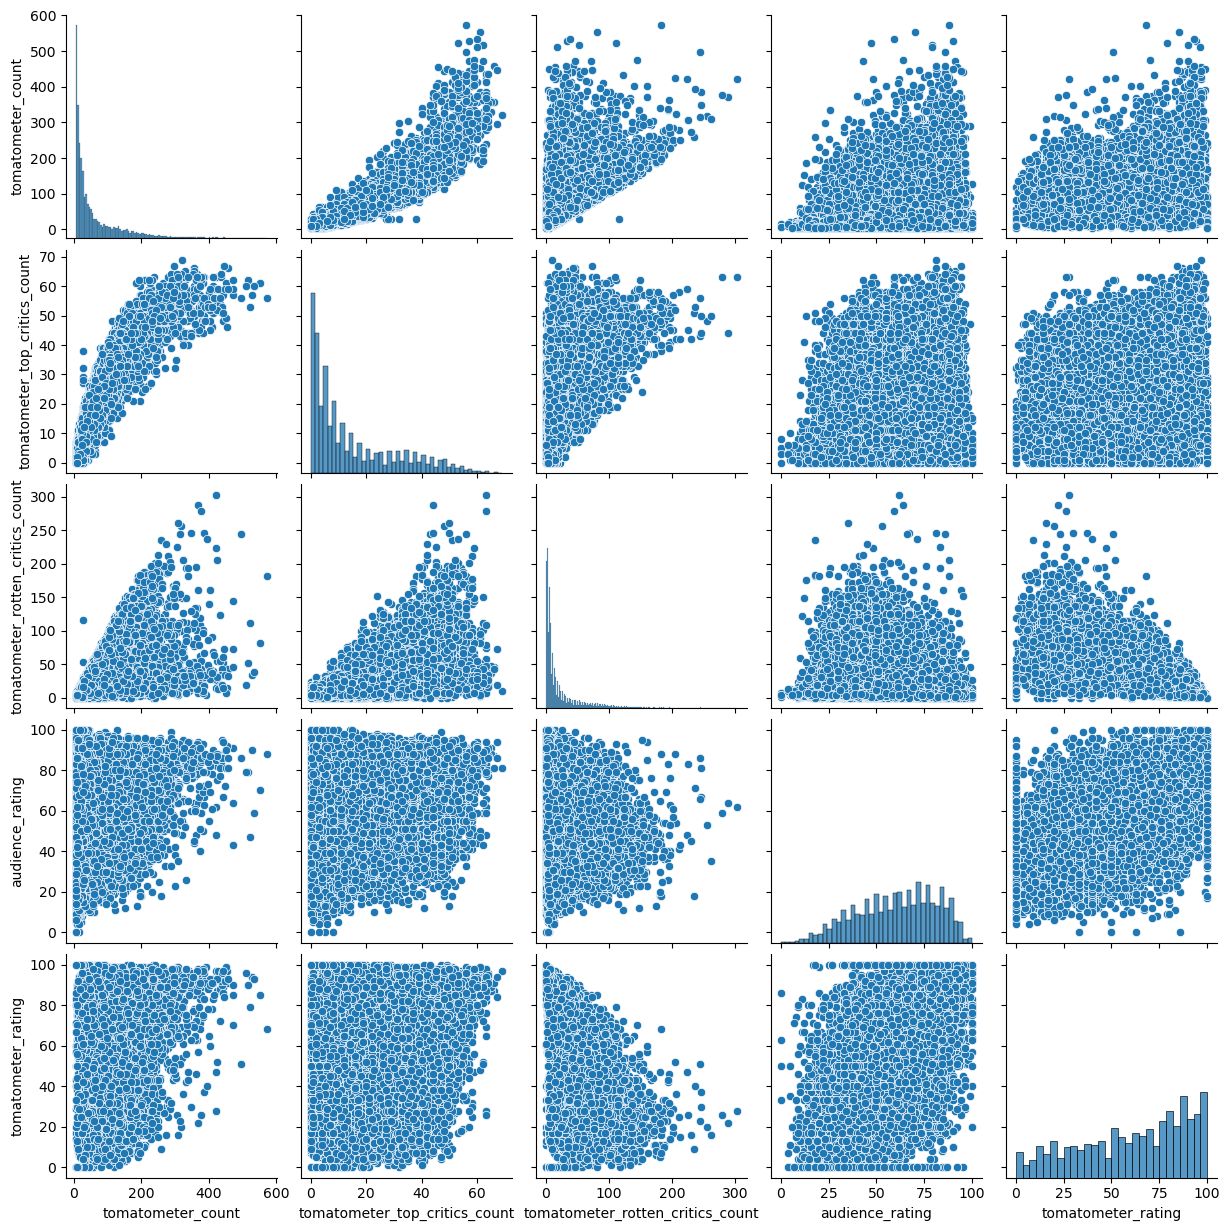

In [24]:
sns.pairplot(rotten_tomatoes_df[['tomatometer_count', 'tomatometer_top_critics_count','tomatometer_rotten_critics_count','audience_rating','tomatometer_rating']])

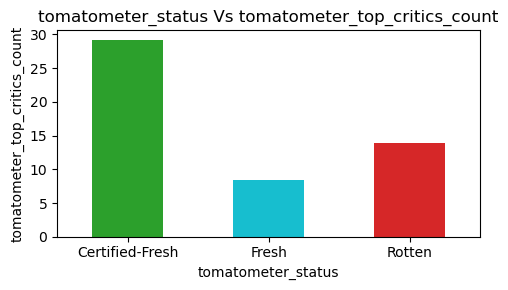

tomatometer_status
Certified-Fresh    29.151580
Fresh               8.464787
Rotten             13.853989
Name: tomatometer_top_critics_count, dtype: float64

In [25]:
#tomatometer_status Vs tomatometer_top_critics_count
dataForPlot = rotten_tomatoes_df.groupby('tomatometer_status')['tomatometer_top_critics_count'].mean()
ax = dataForPlot.plot(kind='bar', figsize=[5, 3], color=['C2', 'C9', 'C3', 'C8'])
ax.set_ylabel('tomatometer_top_critics_count')
ax.set_xlabel('tomatometer_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("tomatometer_status Vs tomatometer_top_critics_count", size=12)

plt.tight_layout()
plt.show()
dataForPlot

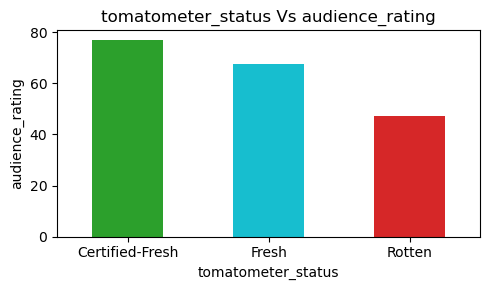

tomatometer_status
Certified-Fresh    76.828645
Fresh              67.546624
Rotten             47.294443
Name: audience_rating, dtype: float64

In [26]:
#tomatometer_status Vs audience_rating
dataForPlot = rotten_tomatoes_df.groupby('tomatometer_status')['audience_rating'].mean()
ax = dataForPlot.plot(kind='bar', figsize=[5, 3], color=['C2', 'C9', 'C3', 'C8'])
ax.set_ylabel('audience_rating')
ax.set_xlabel('tomatometer_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("tomatometer_status Vs audience_rating", size=12)

plt.tight_layout()
plt.show()
dataForPlot

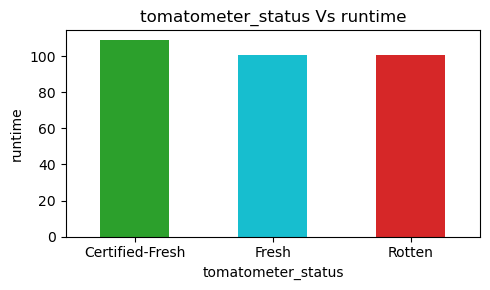

tomatometer_status
Certified-Fresh    108.797177
Fresh              100.605932
Rotten             100.708240
Name: runtime, dtype: float64

In [27]:
#tomatometer_status Vs runtime
dataForPlot = rotten_tomatoes_df.groupby('tomatometer_status')['runtime'].mean()
ax = dataForPlot.plot(kind='bar', figsize=[5, 3], color=['C2', 'C9', 'C3', 'C8'])
ax.set_ylabel('runtime')
ax.set_xlabel('tomatometer_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("tomatometer_status Vs runtime", size=12)

plt.tight_layout()
plt.show()
dataForPlot

Explore the relationship between tomatometer_status and non-numerical variables

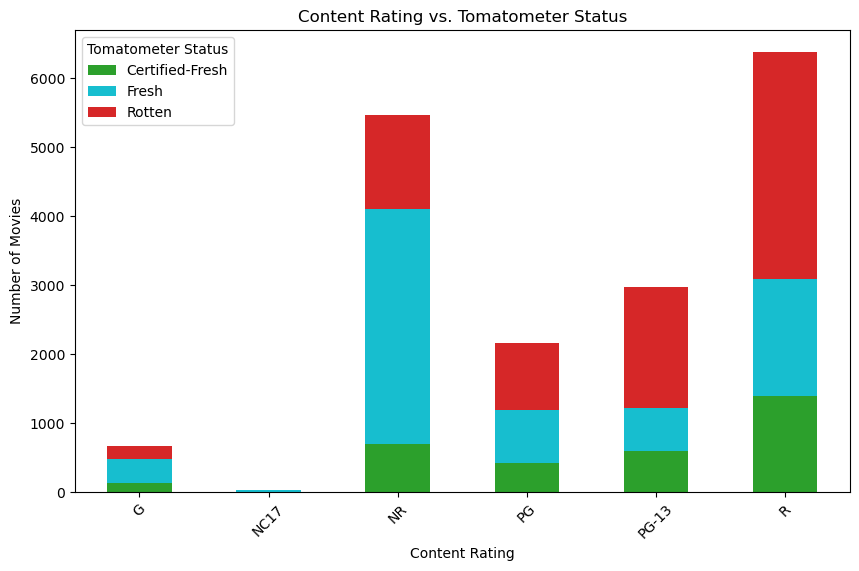

tomatometer_status,Certified-Fresh,Fresh,Rotten
content_rating,,,
G,136,343,197
NC17,8,19,11
NR,700,3398,1376
PG,425,766,977
PG-13,597,619,1763
R,1393,1699,3285


In [28]:
# Content Ratings vs. Tomatometer Status
content_rating_tomatometer = pd.crosstab(rotten_tomatoes_df['content_rating'], 
                                         rotten_tomatoes_df['tomatometer_status'])


colors = ['C2', 'C9', 'C3'] 


content_rating_tomatometer.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Content Rating vs. Tomatometer Status')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Tomatometer Status')

# Show plot
plt.show()
content_rating_tomatometer

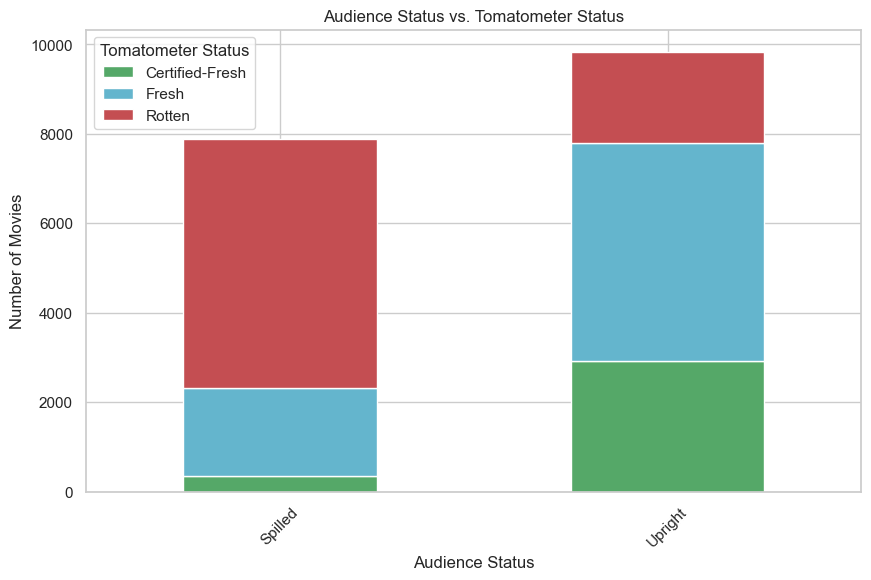

tomatometer_status,Certified-Fresh,Fresh,Rotten
audience_status,,,
Spilled,347,1967,5560
Upright,2912,4877,2049


In [29]:
# Audience Status vs. Tomatometer Status
sns.set(style="whitegrid")


audience_status_tomatometer = pd.crosstab(rotten_tomatoes_df['audience_status'], 
                                          rotten_tomatoes_df['tomatometer_status'])


colors = ['C2', 'C9', 'C3']  


audience_status_tomatometer.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Audience Status vs. Tomatometer Status')
plt.xlabel('Audience Status')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Tomatometer Status')

# Show plot
plt.show()
audience_status_tomatometer

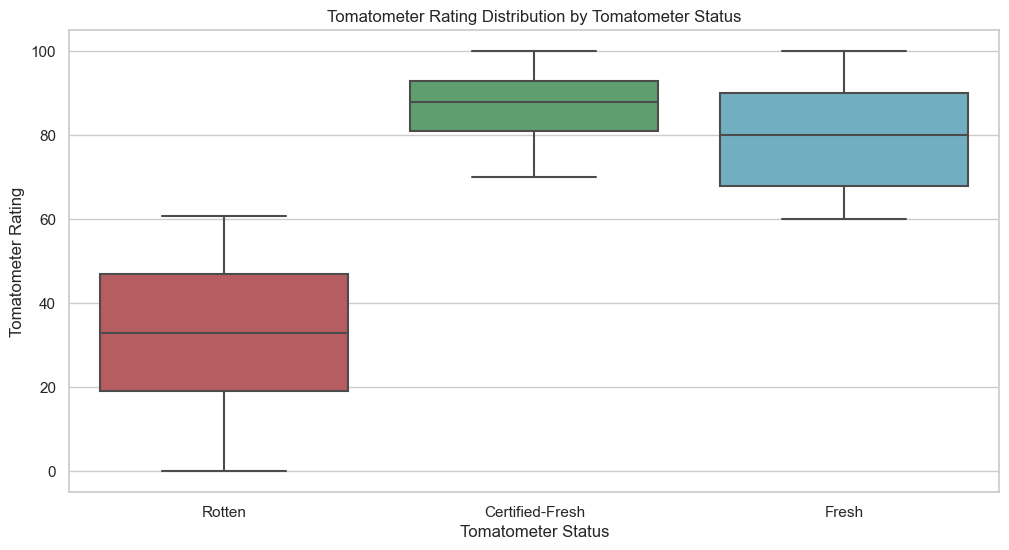

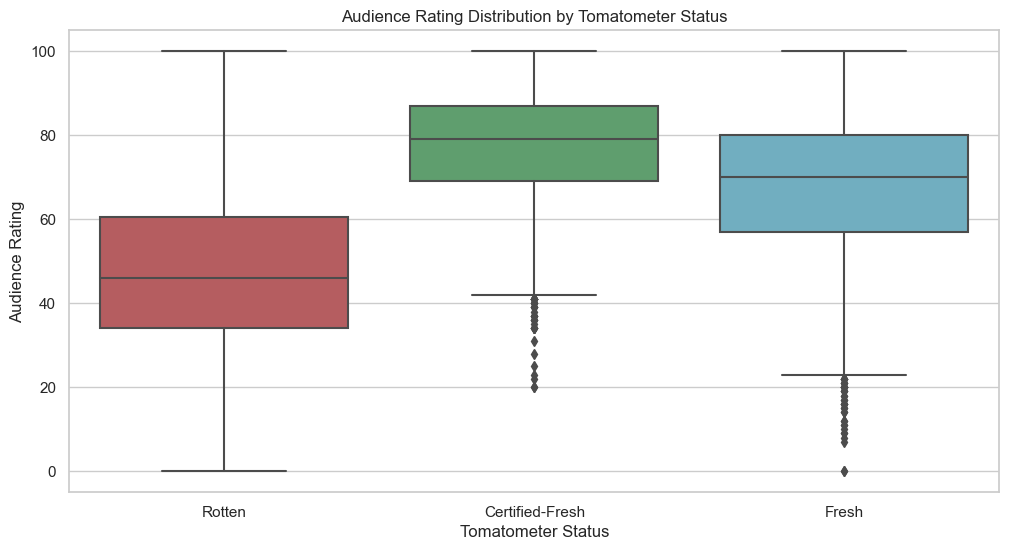

In [30]:
# Box Plot for Tomatometer Rating across different Tomatometer Statuses

colors = ['C3', 'C2', 'C9']

# Box Plot for Tomatometer Rating across different Tomatometer Statuses
plt.figure(figsize=(12, 6))
sns.boxplot(x='tomatometer_status', y='tomatometer_rating', data=rotten_tomatoes_df, palette=colors)
plt.title('Tomatometer Rating Distribution by Tomatometer Status')
plt.xlabel('Tomatometer Status')
plt.ylabel('Tomatometer Rating')
plt.show()

# Box Plot for Audience Rating across different Tomatometer Statuses
plt.figure(figsize=(12, 6))
sns.boxplot(x='tomatometer_status', y='audience_rating', data=rotten_tomatoes_df, palette=colors)
plt.title('Audience Rating Distribution by Tomatometer Status')
plt.xlabel('Tomatometer Status')
plt.ylabel('Audience Rating')
plt.show()

# Random Forest

In [32]:
rotten_tomatoes_df.columns

Index(['content_rating', 'runtime', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [33]:
rotten_tomatoes_df.head()

,content_rating,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,PG,119.0,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,R,90.0,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,R,122.0,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,NR,95.0,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,G,127.0,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [34]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   content_rating                    17712 non-null  object 
 1   runtime                           17712 non-null  float64
 2   tomatometer_status                17712 non-null  object 
 3   tomatometer_rating                17712 non-null  float64
 4   tomatometer_count                 17712 non-null  float64
 5   audience_status                   17712 non-null  object 
 6   audience_rating                   17712 non-null  float64
 7   audience_count                    17712 non-null  float64
 8   tomatometer_top_critics_count     17712 non-null  int64  
 9   tomatometer_fresh_critics_count   17712 non-null  int64  
 10  tomatometer_rotten_critics_count  17712 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [31]:
rotten_tomatoes_df['content_rating'] = rotten_tomatoes_df['content_rating'].astype('category')
rotten_tomatoes_df['audience_status'] = rotten_tomatoes_df['audience_status'].astype('category')
rotten_tomatoes_df['tomatometer_status'] = rotten_tomatoes_df['tomatometer_status'].astype('category')

In [32]:
rotten_tomatoes_df_encoded = pd.get_dummies(rotten_tomatoes_df, prefix_sep='_', drop_first=False)

In [33]:
rotten_tomatoes_df_encoded.columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten', 'audience_status_Spilled',
       'audience_status_Upright'],
      dtype='object')

In [34]:
rotten_tomatoes_df_encoded.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,tomatometer_status_Certified-Fresh,tomatometer_status_Fresh,tomatometer_status_Rotten,audience_status_Spilled,audience_status_Upright
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,False,False,False,True,False,False,False,False,True,True,False
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,False,False,False,False,False,True,True,False,False,False,True
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,False,False,False,False,False,True,False,True,False,True,False
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,False,False,True,False,False,False,True,False,False,False,True
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,True,False,False,False,False,False,False,True,False,False,True


In [35]:
#Separate X and y variables
predictors =['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']
outcome = ['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh', 'tomatometer_status_Rotten']


#Partition
X = rotten_tomatoes_df_encoded[predictors]
y = rotten_tomatoes_df_encoded[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [36]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                             feature  importance       std
9                content_rating_NC17    0.000004  0.000030
8                   content_rating_G    0.000187  0.000434
11                 content_rating_PG    0.000453  0.000429
13                  content_rating_R    0.001151  0.002782
12              content_rating_PG-13    0.001361  0.002458
0                            runtime    0.005173  0.002908
10                 content_rating_NR    0.007029  0.013779
4                     audience_count    0.012551  0.014922
14           audience_status_Spilled    0.021342  0.044811
15           audience_status_Upright    0.025677  0.049201
5      tomatometer_top_critics_count    0.034777  0.044608
3                    audience_rating    0.040950  0.054930
2                  tomatometer_count    0.094363  0.074266
7   tomatometer_rotten_critics_count    0.117410  0.092970
6    tomatometer_fresh_critics_count    0.138898  0.090729
1                 tomatometer_rating    0.498675  0.1528

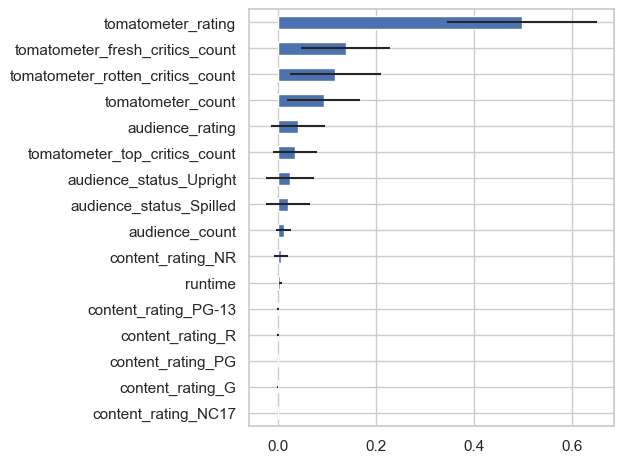

In [37]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the validation set
predictions = rf.predict(valid_X)

y_true = valid_y.values

# Print confusion matrix for each class separately
for i in range(y_true.shape[1]):
    class_name = valid_y.columns[i]
    cm = confusion_matrix(y_true[:, i], predictions[:, i], labels=[0, 1])
    
    print(f"Confusion Matrix for class {class_name}:\n", cm)
    print(f"Classification Report for class {class_name}:\n",
          classification_report(y_true[:, i], predictions[:, i]))


print("Overall Classification Report:\n", classification_report(y_true, predictions))


Confusion Matrix for class tomatometer_status_Certified-Fresh:
 [[5740   25]
 [  35 1285]]
Classification Report for class tomatometer_status_Certified-Fresh:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99      5765
        True       0.98      0.97      0.98      1320

    accuracy                           0.99      7085
   macro avg       0.99      0.98      0.99      7085
weighted avg       0.99      0.99      0.99      7085

Confusion Matrix for class tomatometer_status_Fresh:
 [[4305   36]
 [  26 2718]]
Classification Report for class tomatometer_status_Fresh:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      4341
        True       0.99      0.99      0.99      2744

    accuracy                           0.99      7085
   macro avg       0.99      0.99      0.99      7085
weighted avg       0.99      0.99      0.99      7085

Confusion Matrix for class tomatometer_status_

# Boosted Trees

In [39]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create the multi-output classifier
boost_multi = MultiOutputClassifier(GradientBoostingClassifier())

# Fit the multi-output classifier
boost_multi.fit(train_X, train_y)


MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [40]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the multi-output classifier
boost_multi = MultiOutputClassifier(GradientBoostingClassifier())

# Fit the multi-output classifier
boost_multi.fit(train_X, train_y)

# Predict on the validation set
predictions_multi = boost_multi.predict(valid_X)

# classification report for each class
for i, class_name in enumerate(outcome):
    class_predictions = predictions_multi[:, i]
    class_true = valid_y[outcome].values[:, i]

    print(f"\nClassification Report for class {class_name}:")
    print(classification_report(class_true, class_predictions))

# Flatten the true and predicted values for all classes
true_values = valid_y[outcome].values
predicted_values = predictions_multi

# overall confusion matrix
print("\nOverall Confusion Matrix:")
print(confusion_matrix(true_values.ravel(), predicted_values.ravel()))

# overall classification report
print("\nOverall Classification Report:")
print(classification_report(true_values.ravel(), predicted_values.ravel()))


Classification Report for class tomatometer_status_Certified-Fresh:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      5765
        True       0.98      0.98      0.98      1320

    accuracy                           0.99      7085
   macro avg       0.99      0.99      0.99      7085
weighted avg       0.99      0.99      0.99      7085


Classification Report for class tomatometer_status_Fresh:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4341
        True       0.99      0.99      0.99      2744

    accuracy                           0.99      7085
   macro avg       0.99      0.99      0.99      7085
weighted avg       0.99      0.99      0.99      7085


Classification Report for class tomatometer_status_Rotten:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4064
        True       1.00      1.00      1.00      

# Knn

In [45]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   content_rating                    17712 non-null  category
 1   runtime                           17712 non-null  float64 
 2   tomatometer_status                17712 non-null  category
 3   tomatometer_rating                17712 non-null  float64 
 4   tomatometer_count                 17712 non-null  float64 
 5   audience_status                   17712 non-null  category
 6   audience_rating                   17712 non-null  float64 
 7   audience_count                    17712 non-null  float64 
 8   tomatometer_top_critics_count     17712 non-null  int64   
 9   tomatometer_fresh_critics_count   17712 non-null  int64   
 10  tomatometer_rotten_critics_count  17712 non-null  int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 1.1

In [46]:
rotten_tomatoes_df_encoded.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,tomatometer_status_Certified-Fresh,tomatometer_status_Fresh,tomatometer_status_Rotten,audience_status_Spilled,audience_status_Upright
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,False,False,False,True,False,False,False,False,True,True,False
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,False,False,False,False,False,True,True,False,False,False,True
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,False,False,False,False,False,True,False,True,False,True,False
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,False,False,True,False,False,False,True,False,False,False,True
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,True,False,False,False,False,False,False,True,False,False,True


In [47]:
rotten_tomatoes_df_encoded.shape

(17712, 19)

In [41]:
#Partition the data into train and valid. 
trainData = rotten_tomatoes_df_encoded.sample(frac=0.6, random_state=1)
# sample 40% of the row IDs into the validation set, 
validData = rotten_tomatoes_df_encoded.drop(trainData.index) 
trainData.shape

(10627, 19)

In [42]:
validData.shape

(7085, 19)

In [50]:
rotten_tomatoes_df_encoded.columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten', 'audience_status_Spilled',
       'audience_status_Upright'],
      dtype='object')

In [43]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']])  

# Transform the full dataset
rottenNorm = pd.concat([pd.DataFrame(scaler.transform(rotten_tomatoes_df[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]), 
                                    columns=['zruntime', 'ztomatometer_rating', 'ztomatometer_count', 'zaudience_rating',
       'zaudience_count', 'ztomatometer_top_critics_count',
       'ztomatometer_fresh_critics_count', 'ztomatometer_rotten_critics_count']),
                       rotten_tomatoes_df_encoded[['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']]], axis=1)


In [44]:
trainNorm = rottenNorm.iloc[trainData.index]

validNorm = rottenNorm.iloc[validData.index]
trainNorm.head()

,zruntime,ztomatometer_rating,ztomatometer_count,zaudience_rating,zaudience_count,ztomatometer_top_critics_count,ztomatometer_fresh_critics_count,ztomatometer_rotten_critics_count,tomatometer_status_Certified-Fresh,tomatometer_status_Fresh,tomatometer_status_Rotten,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,audience_status_Spilled,audience_status_Upright
612,1.104243,0.599274,-0.704728,1.443962,-0.043822,-0.895495,-0.559575,-0.621258,False,True,False,False,False,True,False,False,False,False,True
2941,-0.014457,-0.312402,-0.528168,-0.620737,-0.080573,-0.565604,-0.483521,-0.352529,False,False,True,False,False,False,False,False,True,True,False
4371,-0.547171,-1.679916,0.428199,-0.669896,-0.068845,0.885916,-0.483521,1.830897,False,False,True,False,False,False,True,False,False,True,False
13961,0.411714,-0.663046,1.016732,-1.308970,-0.071003,1.083850,0.315043,1.763715,False,False,True,False,False,False,False,False,True,True,False
9073,2.276214,0.564209,-0.645875,0.018337,-0.079590,-0.961474,-0.502535,-0.587667,False,True,False,False,False,False,False,False,True,False,True


# Finding the best K

In [45]:
train_X = trainNorm[['zruntime', 'ztomatometer_rating', 'ztomatometer_count', 'zaudience_rating',
       'zaudience_count', 'ztomatometer_top_critics_count',
       'ztomatometer_fresh_critics_count', 'ztomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']]
train_y = trainNorm[['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten']]
valid_X = validNorm[['zruntime', 'ztomatometer_rating', 'ztomatometer_count', 'zaudience_rating',
       'zaudience_count', 'ztomatometer_top_critics_count',
       'ztomatometer_fresh_critics_count', 'ztomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']]
valid_y = validNorm[['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten']]

# Train a classifier for different values of k
results = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.929852
1    2  0.874382
2    3  0.935215
3    4  0.897671
4    5  0.933098
5    6  0.909245
6    7  0.935498
7    8  0.913197
8    9  0.934792
9   10  0.917996
10  11  0.934510
11  12  0.918278
12  13  0.935356
13  14  0.918278
14  15  0.933945
15  16  0.920395
16  17  0.934227
17  18  0.921101
18  19  0.931828
19  20  0.921665
20  21  0.930699
21  22  0.918419
22  23  0.929005
23  24  0.917431
24  25  0.927452
25  26  0.917855
26  27  0.925194
27  28  0.916443
28  29  0.923924


In [54]:
train_X = trainNorm[['zruntime', 'ztomatometer_rating', 'ztomatometer_count', 'zaudience_rating',
       'zaudience_count', 'ztomatometer_top_critics_count',
       'ztomatometer_fresh_critics_count', 'ztomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']]
train_y = trainNorm[['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten']]
valid_X = validNorm[['zruntime', 'ztomatometer_rating', 'ztomatometer_count', 'zaudience_rating',
       'zaudience_count', 'ztomatometer_top_critics_count',
       'ztomatometer_fresh_critics_count', 'ztomatometer_rotten_critics_count',
       'content_rating_G', 'content_rating_NC17', 'content_rating_NR',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R', 'audience_status_Spilled',
       'audience_status_Upright']]
valid_y = validNorm[['tomatometer_status_Certified-Fresh', 'tomatometer_status_Fresh',
       'tomatometer_status_Rotten']]

# Train a classifier for different values of k
results = []
for k in range(30, 90):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0   30  0.916725
1   31  0.922371
2   32  0.915314
3   33  0.921665
4   34  0.913903
5   35  0.920395
6   36  0.913338
7   37  0.919407
8   38  0.911927
9   39  0.918984
10  40  0.910656
11  41  0.915737
12  42  0.908821
13  43  0.914608
14  44  0.906987
15  45  0.911362
16  46  0.904587
17  47  0.910939
18  48  0.904587
19  49  0.909951
20  50  0.903176
21  51  0.908539
22  52  0.903035
23  53  0.908680
24  54  0.902752
25  55  0.906987
26  56  0.901764
27  57  0.906563
28  58  0.899788
29  59  0.904446
30  60  0.899647
31  61  0.903881
32  62  0.898659
33  63  0.903176
34  64  0.898095
35  65  0.902893
36  66  0.897671
37  67  0.901200
38  68  0.895554
39  69  0.899647
40  70  0.894707
41  71  0.898518
42  72  0.893437
43  73  0.897389
44  74  0.892731
45  75  0.896965
46  76  0.892308
47  77  0.895554
48  78  0.890473
49  79  0.894848
50  80  0.890473
51  81  0.894143
52  82  0.890614
53  83  0.894425
54  84  0.889767
55  85  0.893155
56  86  0.888073
57  87  0.8920

In [46]:
# accuracy of the best k value
knn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)
accuracy_score(valid_y, knn.predict(valid_X))

0.9352152434721243

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [47]:

# partioning the data
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.2,random_state=3)

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


def convert_one_hot_to_labels(y_df):
    if isinstance(y_df, pd.DataFrame) and len(y_df.columns) > 1:
        conditions = [
            y_df['tomatometer_status_Certified-Fresh'] == 1,
            y_df['tomatometer_status_Fresh'] == 1,
            y_df['tomatometer_status_Rotten'] == 1
        ]
        choices = ['Certified-Fresh', 'Fresh', 'Rotten']
        return np.select(conditions, choices, default='Unknown')
    else:
        return y_df

# Convert train_y and valid_y
train_y = convert_one_hot_to_labels(train_y)
valid_y = convert_one_hot_to_labels(valid_y)

# Logistic Regression Model
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

# Intercept and Coefficients
print('Intercept:', logit_reg.intercept_[0])
print('Coefficients:')
print(pd.DataFrame({'Coefficients': logit_reg.coef_[0]}, index=train_X.columns))

# AIC Score 
def AIC_score(y_true, y_prob, df):
    ll = -log_loss(y_true, y_prob, normalize=False)
    aic = -2 * ll + 2 * df
    return aic

# Calculate AIC using probabilities
predicted_probabilities = logit_reg.predict_proba(valid_X)
aic = AIC_score(valid_y, predicted_probabilities, df=len(train_X.columns) + 1)

print('AIC:', aic)


Intercept: -0.01630038434771617
Coefficients:
                                  Coefficients
runtime                           9.461405e-03
tomatometer_rating               -8.361360e-02
tomatometer_count                -1.331107e-02
audience_rating                  -1.298969e-02
audience_count                   -2.182425e-08
tomatometer_top_critics_count     1.496788e-01
tomatometer_fresh_critics_count   2.514157e-01
tomatometer_rotten_critics_count -5.826037e-01
content_rating_G                  9.745839e-04
content_rating_NC17               4.586984e-05
content_rating_NR                -9.110734e-02
content_rating_PG                -1.602840e-03
content_rating_PG-13             -4.273460e-03
content_rating_R                  7.966280e-02
audience_status_Spilled          -2.303352e-02
audience_status_Upright           6.733136e-03
AIC: 2287.9427323703394


In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# Logistic Regression Model
logit_reg = LogisticRegression(penalty="l2", C=1e42, multi_class='ovr', solver='liblinear')
logit_reg.fit(train_X, train_y)

# Intercept and Coefficients for multi-class 
print('Intercepts:', logit_reg.intercept_)
print('Coefficients:')
for class_index, class_name in enumerate(logit_reg.classes_):
    print(f"Class {class_name}")
    print(pd.DataFrame({f'Coefficients for {class_name}': logit_reg.coef_[class_index]}, index=train_X.columns))

# AIC Score Function - adjusted for multi-class classification
def AIC_score(y_true, y_prob, df):
    ll = -log_loss(y_true, y_prob, normalize=False)
    aic = -2 * ll + 2 * (df * (len(logit_reg.classes_) - 1) + len(logit_reg.classes_))
    return aic

# Calculate AIC using probabilities
predicted_probabilities = logit_reg.predict_proba(valid_X)
aic = AIC_score(valid_y, predicted_probabilities, df=len(train_X.columns))

print('AIC:', aic)


Intercepts: [-0.01630038 -0.00126438  0.00134694]
Coefficients:
Class Certified-Fresh
                                  Coefficients for Certified-Fresh
runtime                                               9.461405e-03
tomatometer_rating                                   -8.361360e-02
tomatometer_count                                    -1.331107e-02
audience_rating                                      -1.298969e-02
audience_count                                       -2.182425e-08
tomatometer_top_critics_count                         1.496788e-01
tomatometer_fresh_critics_count                       2.514157e-01
tomatometer_rotten_critics_count                     -5.826037e-01
content_rating_G                                      9.745839e-04
content_rating_NC17                                   4.586984e-05
content_rating_NR                                    -9.110734e-02
content_rating_PG                                    -1.602840e-03
content_rating_PG-13                       

In [50]:
# Create the result DataFrame with the correct class names and matching index
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'p(2)': [p[2] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

interestingCases = [2764, 932, 2721, 702]
print(logit_result.loc[interestingCases])

               actual          p(0)      p(1)      p(2)        predicted
2764            Fresh  2.444453e-03  0.982565  0.014990            Fresh
932            Rotten  2.018062e-12  0.105011  0.894989           Rotten
2721            Fresh  4.553278e-03  0.486171  0.509275           Rotten
702   Certified-Fresh  5.644500e-01  0.435094  0.000456  Certified-Fresh


In [64]:
classificationSummary(train_y,logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.9015)

       Prediction
Actual    0    1    2
     0 2247  356   11
     1  121 4789  532
     2    5  371 5737


In [65]:
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.8927)

       Prediction
Actual    0    1    2
     0  557   88    0
     1   36 1220  146
     2    4  106 1386
